In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
import statistics as st


In [10]:
df=pd.read_excel("creditcardclients.xls",skiprows=1)
df1=pd.read_excel("creditcardclients.xls")
df.info()
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  

[4 rows x 25 columns]

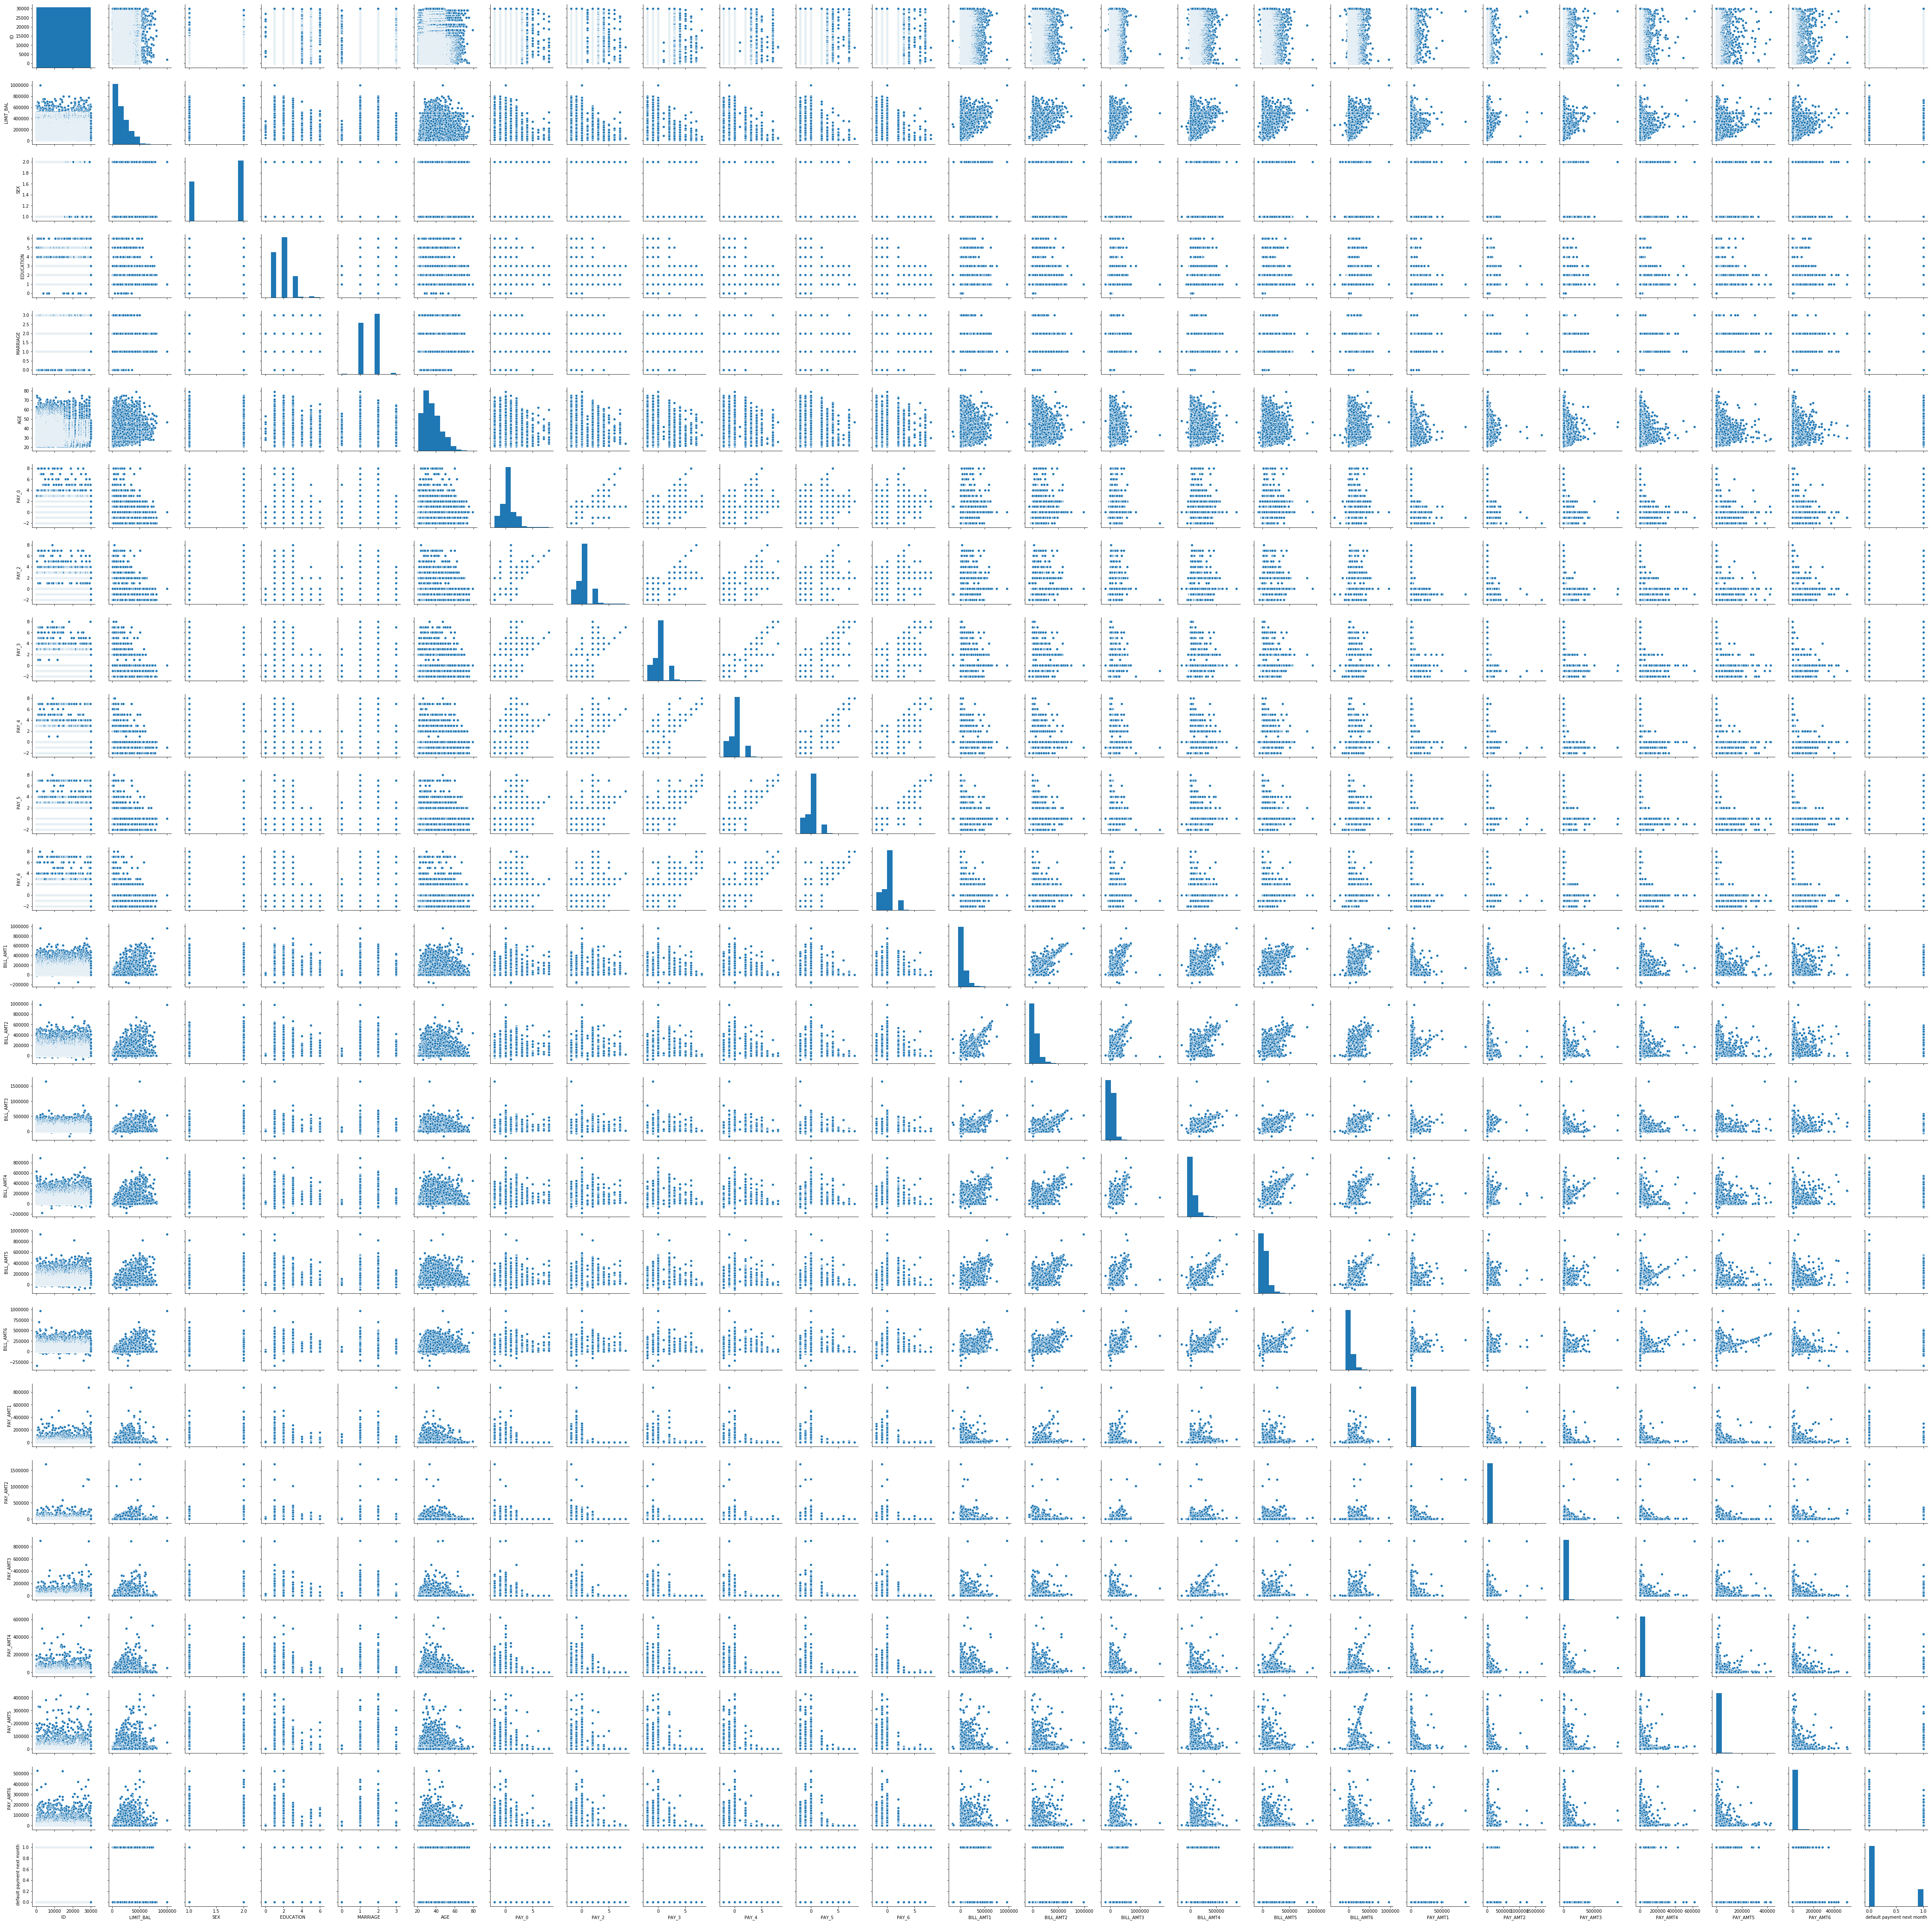

In [3]:
sns.pairplot(df)

In [11]:
df1.head(4)

X1   X2         X3        X4   X5     X6     X7     X8     X9  \
ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   

      X10             ...                    X15        X16        X17  \
ID  PAY_5             ...              BILL_AMT4  BILL_AMT5  BILL_AMT6   
1      -2             ...                      0          0          0   
2       0             ...                   3272       3455       3261   
3       0             ...                  14331      14948      15549   

         X18       X19       X20       X21       X22       X23  \
ID  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6   
1          0       689         0         0         0         0   
2          0      1000      1000      1000         0      2000   
3       1518      1500      1000      1000      1000      5000   

                             Y  
ID  default payment next month  
1                            1  
2                            1  
3                            0  

[4 rows x 24 columns]

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [27]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [9]:
df.AGE.value_counts(sort=True)

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [22]:
for i in df.columns:
    print(f"{i}\n{df[i].value_counts()}\n")

ID
2047     1
1322     1
15629    1
9486     1
11535    1
21792    1
23841    1
17698    1
19747    1
29988    1
25894    1
27943    1
5416     1
7465     1
3371     1
3403     1
13612    1
15661    1
9518     1
11567    1
21824    1
23873    1
17730    1
19779    1
25926    1
27975    1
5448     1
7497     1
13580    1
3339     1
        ..
2740     1
15026    1
629      1
8881     1
6774     1
4727     1
27256    1
25209    1
29307    1
19068    1
17021    1
23166    1
21119    1
10896    1
8849     1
14994    1
12947    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
29339    1
19100    1
17053    1
23198    1
21151    1
10928    1
2049     1
Name: ID, Length: 30000, dtype: int64

LIMIT_BAL
50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
150000     1110
100000     1048
180000      995
360000      881
60000       825
140000      749
230000      737
70000       731
210000      730
130000      729
120000      726
500000      722
16000

In [23]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               30000.000000   30000.000000   
mean              ...               43262.948967   40311.400967   
std               ...               64332.856134   60797.155770   
min               ...             -170000.000000  -81334.000000   
25%               ...                2326.750000    1763.000000   
50%               ...               19052.000000   18104.500000   
75%               ...               54506.000000   50190.500000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   30000.000000   30000.000000  3.000000e+04   30000.00000   
mean    38871.760400    5663.580500  5.921163e+03    5225.68150   
std     59554.107537   16563.280354  2.304087e+04   17606.96147   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1256.000000    1000.000000  8.330000e+02     390.00000   
50%     17071.000000    2100.000000  2.009000e+03    1800.00000   
75%     49198.250000    5006.000000  5.000000e+03    4505.00000   
max    961664.000000  873552.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count   30000.000000   30000.000000   30000.000000                30000.000000  
mean     4826.076867    4799.387633    5215.502567                    0.221200  
std     15666.159744   15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000       0.000000                    0.000000  
25%       296.000000     252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4013.250000    4031.500000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 25 columns]

In [30]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   
4     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [44]:
df=(df.loc[(df["MARRIAGE"]!=0),:])
df.loc[df.MARRIAGE>2,:]

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
15        16      50000    2          3         3   23      1      2      0   
51        52     100000    2          3         3   43      0      0      0   
80        81     470000    2          3         3   33      0      0      0   
239      240     140000    2          2         3   41      0      0      0   
373      374      30000    1          3         3   54      0      0      0   
401      402      60000    2          3         3   42      0      0      0   
464      465     170000    2          3         3   56      1     -2     -1   
531      532      50000    1          2         3   30      0      0      0   
629      630     200000    2          3         3   45     -1     -1     -1   
680      681     110000    2          2         3   45      0      0      0   
703      704      50000    2          2         3   30      1      3      2   
704      705      30000    2          2         3   22      1      2      4   
710      711      50000    1          1         3   49      0      0      0   
810      811     120000    2          1         3   44      0      0      2   
847      848      50000    1          2         3   42      2      0      0   
870      871      20000    2          2         3   52      0      0      0   
896      897     110000    1          1         3   55      1      2      2   
898      899      90000    2          3         3   51      0      0      0   
973      974     150000    2          1         3   30     -2     -2     -2   
1020    1021      70000    1          1         3   57      0      0      0   
1034    1035      60000    2          2         3   39      1     -2     -2   
1271    1272      10000    2          2         3   46      1      2      0   
1456    1457      50000    2          3         3   43      0      0      0   
1485    1486      20000    2          2         3   44      2      2      7   
1552    1553      20000    2          3         3   47      0      0      0   
1581    1582      20000    1          3         3   47      0      0      0   
1616    1617      20000    1          2         3   35      1     -2     -2   
1671    1672      50000    2          2         3   51      0     -1      0   
1846    1847      50000    1          2         3   53      0      0      0   
2142    2143      70000    2          3         3   49      2      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
27317  27318      70000    1          3         3   47      0      0      0   
27381  27382     200000    1          3         3   48     -1     -1     -1   
27402  27403      20000    1          2         3   37      0      0      0   
27405  27406     100000    1          5         3   44      2      2      0   
27526  27527      30000    1          2         3   53      1     -2     -1   
27537  27538      20000    1          2         3   53      0      0      0   
27581  27582      70000    1          3         3   61      3      2      2   
27884  27885     160000    2          2         3   27      0      0     -1   
28008  28009     240000    2          1         3   29      1     -2     -2   
28079  28080     150000    2          2         3   48      0      0      0   
28190  28191      80000    2          3         3   43      0      0     -2   
28340  28341      20000    2          3         3   40     -1     -1     -1   
28345  28346     280000    2          2         3   40      0      0      0   
28443  28444      80000    2          2         3   36      0      0      0   
28504  28505      50000    2          3         3   46     -1     -1     -1   
28550  28551      50000    2          2         3   34      0      0      0   
28716  28717     340000    2          1         3   42     -1     -1     -1   
28736  28737     140000    2          2         3   28      0      0      0   
28752  28753     180000    2          2         3   41      

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


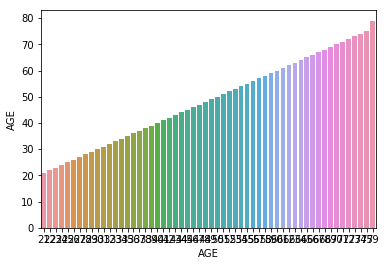

In [57]:
sns.barplot(data=df,x=df.AGE,y=df.loc[df['default payment next month']==0,'AGE'])

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


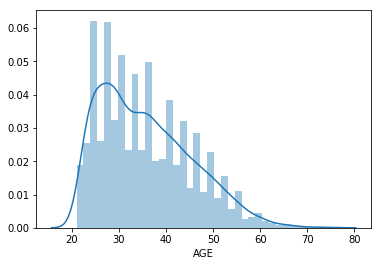

In [61]:
sns.distplot(df.loc[df['default payment next month']==1,"AGE"])

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


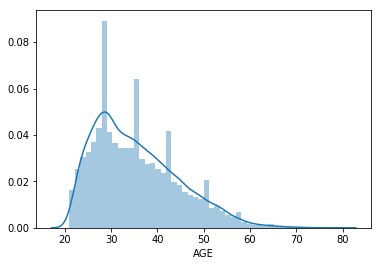

In [62]:
sns.distplot(df.loc[df['default payment next month']==0,"AGE"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29946 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29946 non-null int64
LIMIT_BAL                     29946 non-null int64
SEX                           29946 non-null int64
EDUCATION                     29946 non-null int64
MARRIAGE                      29946 non-null int64
AGE                           29946 non-null int64
PAY_0                         29946 non-null int64
PAY_2                         29946 non-null int64
PAY_3                         29946 non-null int64
PAY_4                         29946 non-null int64
PAY_5                         29946 non-null int64
PAY_6                         29946 non-null int64
BILL_AMT1                     29946 non-null int64
BILL_AMT2                     29946 non-null int64
BILL_AMT3                     29946 non-null int64
BILL_AMT4                     29946 non-null int64
BILL_AMT5                     29946 non-null int64
BILL_AMT6               

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


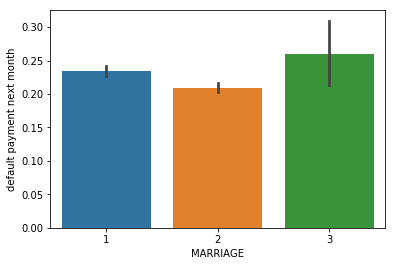

In [49]:
sns.barplot(data=df,x=df.MARRIAGE,y=df["default payment next month"])

In [68]:
df = df.loc[(df.EDUCATION!=0) & (df.EDUCATION<=4),:]
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  29601.000000    29601.000000  29601.000000  29601.000000  29601.000000   
mean   14971.758927   167550.544914      1.603189      1.815479      1.555454   
std     8660.184430   129944.020953      0.489244      0.710399      0.518092   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7474.000000    50000.000000      1.000000      1.000000      1.000000   
50%    14953.000000   140000.000000      2.000000      2.000000      2.000000   
75%    22463.000000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  29601.000000  29601.000000  29601.000000  29601.000000  29601.000000   
mean      35.464072     -0.014932     -0.131313     -0.163440     -0.218303   
std        9.213243      1.124503      1.199642      1.199793      1.172220   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               29601.000000   29601.000000   
mean              ...               43122.554204   40235.545184   
std               ...               64196.383913   60699.344884   
min               ...             -170000.000000  -81334.000000   
25%               ...                2329.000000    1780.000000   
50%               ...               19005.000000   18091.000000   
75%               ...               54271.000000   50072.000000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count   29601.000000   29601.000000  2.960100e+04   29601.000000   
mean    38858.449816    5649.560319  5.894788e+03    5198.415898   
std     59519.893043   16568.264941  2.308919e+04   17580.914806   
min   -339603.000000       0.000000  0.000000e+00       0.000000   
25%      1278.000000    1000.000000  8.250000e+02     390.000000   
50%     17118.000000    2100.000000  2.007000e+03    1800.000000   
75%     49121.000000    5005.000000  5.000000e+03    4500.000000   
max    961664.000000  873552.000000  1.684259e+06  896040.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default payment next month  
count   29601.000000   29601.000000   29601.000000                29601.000000  
mean     4828.659268    4795.032735    5181.326374                    0.223134  
std     15711.057992   15244.217154   17657.260739                    0.416355  
min         0.000000       0.000000       0.000000                    0.000000  
25%       298.000000     259.000000     138.000000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4014.000000    4042.000000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 25 columns]

In [69]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [75]:
current_columns = df.columns
new_columns = ["ID","Credit","Sex","Education","Marital_Status","Age","Repayment_Status_September","Repayment_Status_August",
               "Repayment_Status_July",'Repayment_Status_June','Repayment_Status_May','Repayment_Status_April',
              'Bill_Amount_September','Bill_Amount_August','Bill_Amount_July','Bill_Amount_June','Bill_Amount_May',
              'Bill_Amount_April','Amount_Paid_September','Amount_Paid_August','Amount_Paid_July','Amount_Paid_June',
              'Amount_Paid_May','Amount_Paid_April','Default']

def rename_columns(df, current_columns, new_columns):
    
    for column, name in list(zip(current_columns,new_columns)):
        df.rename(columns={column:name},inplace=True)
    return df

rename_columns(df, current_columns, new_columns)
df.set_index("ID")

Credit  Sex  Education  Marital_Status  Age  \
ID                                                   
1       20000    2          2               1   24   
2      120000    2          2               2   26   
3       90000    2          2               2   34   
4       50000    2          2               1   37   
5       50000    1          2               1   57   
6       50000    1          1               2   37   
7      500000    1          1               2   29   
8      100000    2          2               2   23   
9      140000    2          3               1   28   
10      20000    1          3               2   35   
11     200000    2          3               2   34   
12     260000    2          1               2   51   
13     630000    2          2               2   41   
14      70000    1          2               2   30   
15     250000    1          1               2   29   
16      50000    2          3               3   23   
17      20000    1          1               2   24   
18     320000    1          1               1   49   
19     360000    2          1               1   49   
20     180000    2          1               2   29   
21     130000    2          3               2   39   
22     120000    2          2               1   39   
23      70000    2          2               2   26   
24     450000    2          1               1   40   
25      90000    1          1               2   23   
26      50000    1          3               2   23   
27      60000    1          1               2   27   
28      50000    2          3               2   30   
29      50000    2          3               1   47   
30      50000    1          1               2   26   
...       ...  ...        ...             ...  ...   
29971  360000    1          1               1   34   
29972   80000    1          3               1   36   
29973  190000    1          1               1   37   
29974  230000    1          2               1   35   
29975   50000    1          2               1   37   
29976  220000    1          2               1   41   
29977   40000    1          2               2   47   
29978  420000    1          1               2   34   
29979  310000    1          2               1   39   
29980  180000    1          1               1   32   
29981   50000    1          3               2   42   
29982   50000    1          2               1   44   
29983   90000    1          2               1   36   
29984   20000    1          2               1   44   
29985   30000    1          2               2   38   
29986  240000    1          1               2   30   
29987  360000    1          1               2   35   
29988  130000    1          1               2   34   
29989  250000    1          1               1   34   
29990  150000    1          1               2   35   
29991  140000    1          2               1   41   
29992  210000    1          2               1   34   
29993   10000    1          3               1   43   
29994  100000    1          1               2   38   
29995   80000    1          2               2   34   
29996  220000    1          3               1   39   
29997  150000    1          3               2   43   
29998   30000    1          2               2   37   
29999   80000    1          3               1   41   
30000   50000    1          2               1   46   

       Repayment_Status_September  Repayment_Status_August  \
ID                                                           
1                               2                        2   
2                              -1                        2   
3                               0                        0   
4                               0                        0   
5                              -1                        0   
6                               0                        0   
7                               0                        0   
8                               0             

In [76]:
df.head()

ID  Credit  Sex  Education  Marital_Status  Age  \
0   1   20000    2          2               1   24   
1   2  120000    2          2               2   26   
2   3   90000    2          2               2   34   
3   4   50000    2          2               1   37   
4   5   50000    1          2               1   57   

   Repayment_Status_September  Repayment_Status_August  Repayment_Status_July  \
0                           2                        2                     -1   
1                          -1                        2                      0   
2                           0                        0                      0   
3                           0                        0                      0   
4                          -1                        0                     -1   

   Repayment_Status_June   ...     Bill_Amount_June  Bill_Amount_May  \
0                     -1   ...                    0                0   
1                      0   ...                 3272             3455   
2                      0   ...                14331            14948   
3                      0   ...                28314            28959   
4                      0   ...                20940            19146   

   Bill_Amount_April  Amount_Paid_September  Amount_Paid_August  \
0                  0                      0                 689   
1               3261                      0                1000   
2              15549                   1518                1500   
3              29547                   2000                2019   
4              19131                   2000               36681   

   Amount_Paid_July  Amount_Paid_June  Amount_Paid_May  Amount_Paid_April  \
0                 0                 0                0                  0   
1              1000              1000                0               2000   
2              1000              1000             1000               5000   
3              1200              1100             1069               1000   
4             10000              9000              689                679   

   Default  
0        1  
1        1  
2        0  
3        0  
4        0  

[5 rows x 25 columns]

In [77]:
df.columns

Index(['ID', 'Credit', 'Sex', 'Education', 'Marital_Status', 'Age',
       'Repayment_Status_September', 'Repayment_Status_August',
       'Repayment_Status_July', 'Repayment_Status_June',
       'Repayment_Status_May', 'Repayment_Status_April',
       'Bill_Amount_September', 'Bill_Amount_August', 'Bill_Amount_July',
       'Bill_Amount_June', 'Bill_Amount_May', 'Bill_Amount_April',
       'Amount_Paid_September', 'Amount_Paid_August', 'Amount_Paid_July',
       'Amount_Paid_June', 'Amount_Paid_May', 'Amount_Paid_April', 'Default'],
      dtype='object')

In [86]:
df["Balance_May"]  = df['Bill_Amount_April'] -  df["Amount_Paid_April"]

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


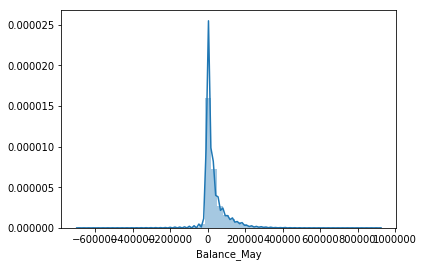

In [90]:
sns.distplot(df["Balance_May"])

In [91]:
df.to_csv("CreditCardClients_Clean.csv")